# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis/observations

### City Latitude vs Temperature

*  There seems to exist a strong relation beetween Latitude and Temperature in terms of distance to the poles and Earth’s Equator line. It is possible to say that the farther the cities are from the Earth's Equator line the lower are the temperatures. Also, it could be posible to afirm that the North Hemisphere contains the largest number of cities with temperatures lower than 32ºF (water freezing point), which means that at this time of the year these cities tend to have snowfalls.

*  A small indicator of colder temperatures in cities closer to the South Pole is also noticed, possibly due to the fact that even though it’s Summer time on the South Hemisphere, the Sunrays don’t fall straight on the poles, making it colder than cities located closer to the Equator.

### City Latitude vs Humidity

*  Cities with high level of humidity figuring in both hemispheres might represent a weak correlation between *Latitude* and *Humidity*. Even though, there are two small indicators that could be questioned:

1) cities closer to the North Pole tends to be more humid
2) cities closer to the Earth's Equator line shows to be drier (low humidity)

Further analysis would be necessary to draw conclusions and confirm the findings.

### Latitude vs Cloudiness

*  The spread of the scatter plot shows weak or no relationship between Latitude and Cloudiness, as dots are all over the plot. No patterns or outliers intuitively identified.

### Latitude vs Wind Speed
* It is possible to see some outliers on the North Hemisphere (cities with high wind speed), but apart from that the pattern is low wind speed in both Hemispheres for this time of year.

_The following data collection was done 01/12/2020_


In [50]:
%%writefile api_keys.py
api_key = "19a9d4248a2a5b71ee049c3741553003"


Overwriting api_keys.py


In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90.000, 90.000)
lng_range = (-180.000, 180.000)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#São Paulo lat/lng
#lats = np.random.uniform(low=-19.000, high=-25.6500, size=1500)
#lngs = np.random.uniform(low=-52.0000, high=-44.0000, size=1500)

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
#example/base of json structure to collect variables
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&q=sao paulo"
response = requests.get(url)
response_json = response.json()
response_json



{'coord': {'lon': -46.64, 'lat': -23.55},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 294.94,
  'feels_like': 296.33,
  'temp_min': 293.15,
  'temp_max': 297.15,
  'pressure': 1018,
  'humidity': 88},
 'visibility': 4000,
 'wind': {'speed': 3.1, 'deg': 130},
 'clouds': {'all': 75},
 'dt': 1578954983,
 'sys': {'type': 1,
  'id': 8394,
  'country': 'BR',
  'sunrise': 1578904274,
  'sunset': 1578952706},
 'timezone': -10800,
 'id': 3448439,
 'name': 'Sao Paulo',
 'cod': 200}

In [36]:
# Set url for API


#cities = ["punta arenas", "bredasdorp", "busselton", "qaanaaq","nome","avarua","ushuaia"]
# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity = []
windspeed = []
cloudiness = []
final_cities = []
record_count = 1
set_count = 1

# Loop through the list of cities and perform a request for data on each
for i,city in enumerate(cities[:500]):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&q={city}&units=imperial"
        response = requests.get(url).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windspeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        final_cities.append(city)
        #print("city number is: " +str(index)+ ","" city name is : " + city )
        #time.sleep(3)
    except:
        print("This is an error message!")

This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!
This is an error message!


In [37]:
cities_dict = {"Cities" : final_cities,
               "Latitude" : lat,
               "Temp" : temp,
               "Humidity": humidity,
               "Windspeed" : windspeed,
               "Cloudiness": cloudiness}
cities_df = pd.DataFrame(cities_dict)
cities_df

,Cities,Latitude,Temp,Humidity,Windspeed,Cloudiness
0,batemans bay,-35.72,71.01,84,1.01,28
1,hilo,19.73,75.00,99,7.56,95
2,bluff,-46.60,50.00,91,1.01,88
3,jamestown,42.10,35.01,92,6.93,1
4,tiksi,71.69,-18.78,89,5.37,55
...,...,...,...,...,...,...
457,zemio,5.03,100.04,13,3.96,25
458,wewak,-3.55,78.57,82,15.55,99
459,hirtshals,57.59,46.99,81,19.46,75
460,nioro,13.35,87.87,10,11.50,0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
cities_df.to_csv(r'cities.csv', index = False, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

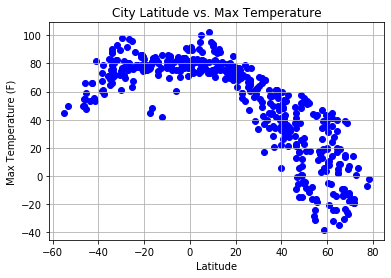

In [51]:
plt.scatter(cities_df['Latitude'],cities_df['Temp'],color='blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.savefig("lat-temperature.png")


#### Latitude vs. Humidity Plot

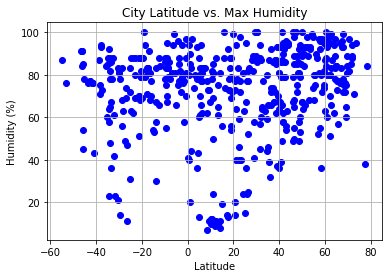

In [52]:
plt.scatter(cities_df['Latitude'],cities_df['Humidity'],color='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Max Humidity')
plt.savefig("lat-humidity.png")

#### Latitude vs. Cloudiness Plot

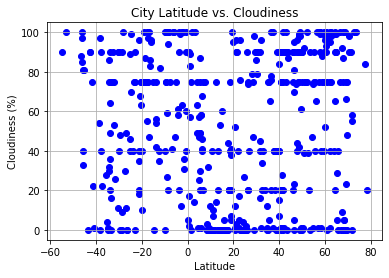

In [53]:
plt.scatter(cities_df['Latitude'],cities_df['Cloudiness'],color='blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.savefig("lat-cloudiness.png")

#### Latitude vs. Wind Speed Plot

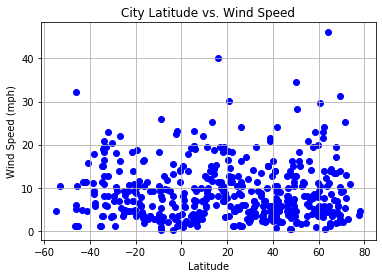

In [54]:
plt.scatter(cities_df['Latitude'],cities_df['Windspeed'],color='blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.savefig("lat-windspeed.png")